## Метрики моделей классификации 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 

iris=load_iris()

In [2]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=7, test_size=0.2)
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=7, 
#                                                     test_size=0.2, stratify=iris.target)

kfold = KFold(n_splits=10, shuffle=True, random_state=1)
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[1, 2, 3, 4, 8, 12, 16, 20]
p=[1,2,3]
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Индекс лучшего результата:\n{}".format(grid.best_index_))
print("------------------------------------")
print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid.best_params_))
print("------------------------------------")
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("------------------------------------")
print("Настройки лучшей модели в контейнере:\n{}\n".format(grid.best_estimator_))

----------------- Обучили и тестировали -------------------
Индекс лучшего результата:
51
------------------------------------
Словарь с параметрами для лучшего решения:
{'classifier': KNeighborsClassifier(n_neighbors=3, p=1), 'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'uniform', 'preprocessing': Normalizer()}

------------------------------------
Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.983333

------------------------------------
Настройки лучшей модели в контейнере:
Pipeline(steps=[('preprocessing', Normalizer()),
                ('classifier', KNeighborsClassifier(n_neighbors=3, p=1))])



In [3]:
# Вывод всех результатов, а почему 51  не на первом месте?
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

,95,51,67,79,87,99,103,123,127,59,...,38,14,18,30,178,154,162,182,186,190
mean_fit_time,0.00057,0.000536,0.000516,0.000564,0.000623,0.000552,0.000538,0.000566,0.00052,0.000553,...,0.00112,0.001185,0.001153,0.001171,0.001123,0.001136,0.001133,0.001174,0.001184,0.001169
std_fit_time,0.000047,0.000097,0.000002,0.000068,0.000108,0.000043,0.000021,0.000054,0.000002,0.000035,...,0.000017,0.00009,0.000036,0.000068,0.000028,0.000062,0.000054,0.000075,0.000073,0.00007
mean_score_time,0.000706,0.000804,0.000837,0.000631,0.000694,0.000811,0.000649,0.000836,0.000627,0.000825,...,0.000621,0.000607,0.000822,0.000611,0.000787,0.000781,0.000855,0.000637,0.000926,0.000701
std_score_time,0.000028,0.000092,0.000032,0.000029,0.000079,0.000019,0.000046,0.00004,0.000008,0.000046,...,0.000114,0.000054,0.000017,0.00003,0.000012,0.00001,0.000016,0.000042,0.000068,0.000027
param_classifier,"KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)",...,"KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)","KNeighborsClassifier(n_neighbors=3, p=1)"
param_classifier__n_neighbors,4,3,3,4,4,8,8,12,12,3,...,2,1,1,2,20,16,16,20,20,20
param_classifier__p,3,1,3,1,2,1,1,1,1,2,...,2,2,3,1,2,2,3,2,3,3
param_classifier__weights,distance,uniform,uniform,distance,distance,uniform,distance,uniform,distance,uniform,...,distance,distance,uniform,distance,uniform,uniform,uniform,distance,uniform,distance
param_preprocessing,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),...,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler()
params,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...


In [4]:
# по порядку, но не очень удачно поменяйте числа
res = gridresults.sort_values(["rank_test_score"])
res[res['rank_test_score']==1].sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__n_neighbors,param_classifier__p,param_classifier__weights,param_preprocessing,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
51,0.000536,0.000097,0.000804,0.000092,"KNeighborsClassifier(n_neighbors=3, p=1)",3,1,uniform,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,0.990741,0.972222,0.981481,0.972222,0.981481,0.972222,0.972222,0.972222,0.977778,0.007407
55,0.000541,0.000041,0.000644,0.000074,"KNeighborsClassifier(n_neighbors=3, p=1)",3,1,distance,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
59,0.000553,0.000035,0.000825,0.000046,"KNeighborsClassifier(n_neighbors=3, p=1)",3,2,uniform,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,0.990741,0.972222,0.981481,0.972222,0.972222,0.972222,0.981481,0.972222,0.977778,0.007407
67,0.000516,0.000002,0.000837,0.000032,"KNeighborsClassifier(n_neighbors=3, p=1)",3,3,uniform,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,0.990741,0.972222,0.990741,0.981481,0.981481,0.981481,0.990741,0.981481,0.984259,0.005929
79,0.000564,0.000068,0.000631,0.000029,"KNeighborsClassifier(n_neighbors=3, p=1)",4,1,distance,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
87,0.000623,0.000108,0.000694,0.000079,"KNeighborsClassifier(n_neighbors=3, p=1)",4,2,distance,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
95,0.000570,0.000047,0.000706,0.000028,"KNeighborsClassifier(n_neighbors=3, p=1)",4,3,distance,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
99,0.000552,0.000043,0.000811,0.000019,"KNeighborsClassifier(n_neighbors=3, p=1)",8,1,uniform,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,0.981481,0.972222,0.990741,0.972222,0.972222,0.972222,0.972222,0.972222,0.976852,0.007465
103,0.000538,0.000021,0.000649,0.000046,"KNeighborsClassifier(n_neighbors=3, p=1)",8,1,distance,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
123,0.000566,0.000054,0.000836,0.000040,"KNeighborsClassifier(n_neighbors=3, p=1)",12,1,uniform,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,0.981481,0.981481,0.990741,0.981481,0.981481,0.981481,0.981481,0.981481,0.982407,0.002778


In [5]:
grid.cv_results_['params'][grid.best_index_]

{'classifier': KNeighborsClassifier(n_neighbors=3, p=1),
 'classifier__n_neighbors': 3,
 'classifier__p': 1,
 'classifier__weights': 'uniform',
 'preprocessing': Normalizer()}

In [6]:
grid.cv_results_['params'][143]

{'classifier': KNeighborsClassifier(n_neighbors=3, p=1),
 'classifier__n_neighbors': 12,
 'classifier__p': 3,
 'classifier__weights': 'distance',
 'preprocessing': Normalizer()}

In [7]:
from sklearn.pipeline import make_pipeline

preproc_1=grid.cv_results_['params'][143]['preprocessing']
model_1=grid.cv_results_['params'][143]['classifier']

pipe_1=make_pipeline(preproc_1, model_1)
pipe_1.fit(X_train, y_train)

display(pipe_1.score(X_test, y_test))
pipe_1

0.9333333333333333

Pipeline(steps=[('normalizer', Normalizer()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=3, p=1))])

In [8]:
# соберем блоки препроцессинга и классификатора для контейнера
grid.cv_results_['params'][186]

{'classifier': KNeighborsClassifier(n_neighbors=3, p=1),
 'classifier__n_neighbors': 20,
 'classifier__p': 3,
 'classifier__weights': 'uniform',
 'preprocessing': RobustScaler()}

In [9]:
# крайне полезная комбинация map и get 
preproc_2, model_2 = map(grid.cv_results_['params'][186].get, ['preprocessing','classifier'])

pipe_2=make_pipeline(preproc_2, model_2)
pipe_2.fit(X_train, y_train)

display(pipe_2.score(X_test, y_test))
pipe_2

0.7666666666666667

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=3, p=1))])

In [10]:
grid.best_estimator_

Pipeline(steps=[('preprocessing', Normalizer()),
                ('classifier', KNeighborsClassifier(n_neighbors=3, p=1))])

In [11]:
pipe_1

Pipeline(steps=[('normalizer', Normalizer()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=3, p=1))])

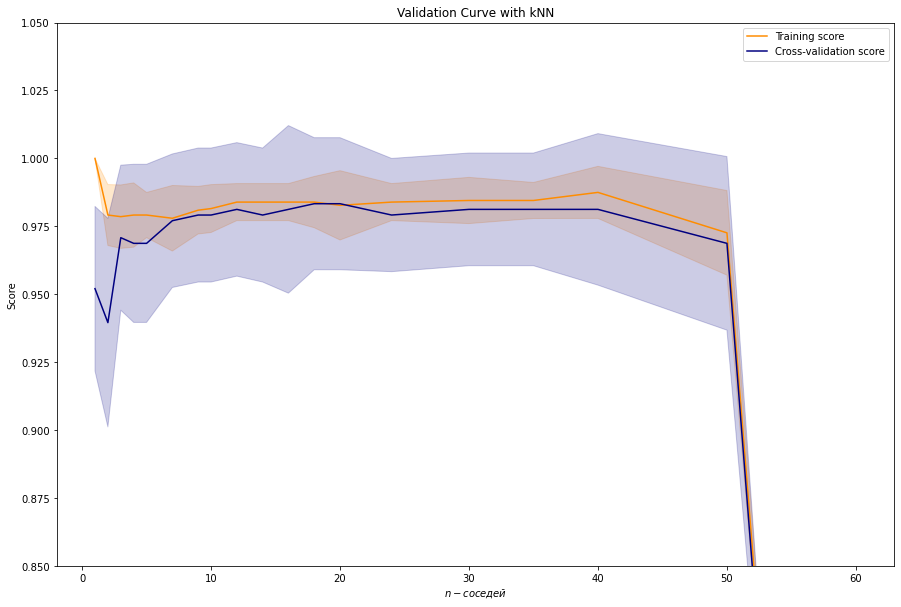

In [12]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedShuffleSplit

# затем заменим на pipe_1, почему не работает?
pipi_gs = grid.best_estimator_

n_range = [1,2,3,4,5,7,9,10,12,14,16,18,20,24,30,35,40,50,55,60]
train_scores, test_scores = validation_curve(
    pipi_gs, X_train, y_train,
    param_name="classifier__n_neighbors", 
    param_range=n_range,
    cv=StratifiedShuffleSplit(n_splits=20,  test_size=0.2, train_size=0.7, random_state=2), 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve with kNN")
plt.xlabel("$n-соседей$")
plt.ylabel("Score")
plt.ylim(0.85, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.legend(loc="best")
plt.show()

In [13]:
pipe_fin = Pipeline(steps=[('preprocessing', Normalizer()),
                ('classifier', KNeighborsClassifier(n_neighbors=20))])
pipe_fin.fit(X_train, y_train)
pipe_fin.score(X_test, y_test)

0.9666666666666667

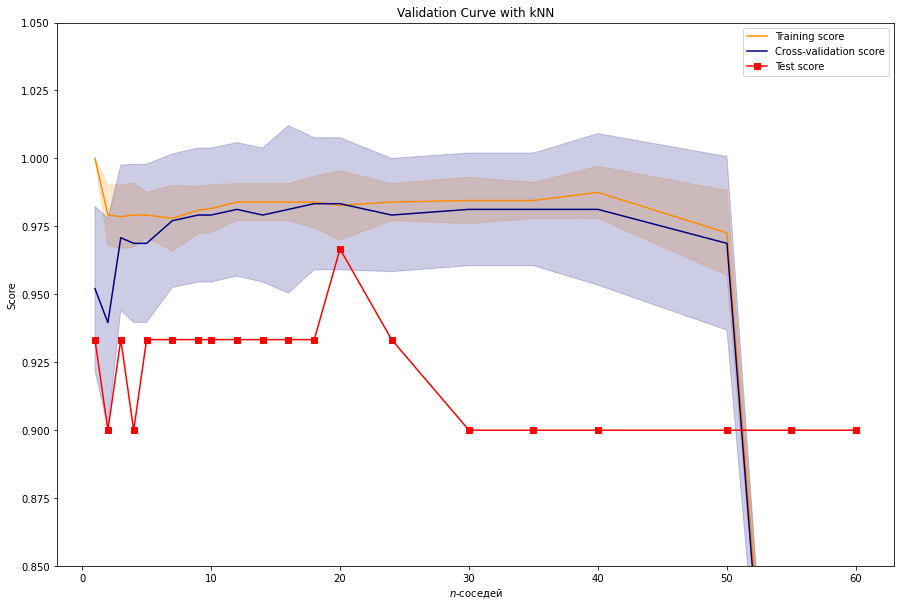

In [15]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedShuffleSplit

# затем заменим на pipe_1, почему не работает?
pipi_gs = grid.best_estimator_

n_range = [1,2,3,4,5,7,9,10,12,14,16,18,20,24,30,35,40,50,55,60]
train_scores, test_scores = validation_curve(
    pipi_gs, X_train, y_train,
    param_name="classifier__n_neighbors", 
    param_range=n_range,
    cv=StratifiedShuffleSplit(n_splits=20,  test_size=0.2, train_size=0.7, random_state=2), 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

##################
test_sc=[]
for n in n_range:
    pipi_gs.set_params(classifier__n_neighbors = n)
    test_sc.append(pipi_gs.score(X_test , y_test))
##################
plt.figure(figsize=(15,10))

plt.title("Validation Curve with kNN")
plt.xlabel("$n$-соседей")
plt.ylabel("Score")
plt.ylim(0.85, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
##################
plt.plot(n_range, test_sc, label="Test score", color="red", marker="s")
##################
plt.legend(loc="best")
plt.show()